In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
x = np.array([0,.25,.5,.75,1])
y = np.array([1,1.284,1.6487,2.117,2.7183])

In [3]:
def mmq(x,y,n):
    phi = [np.array([]) for _ in range(n+1)]
    f = np.array([i for i in y])
    for i,j in itertools.product(range(len(x)),range(n+1)):
        phi[j] = np.append(phi[j],x[i]**j)
    A,b = np.empty((n+1,n+1)),np.empty(n+1)
    for i in range(n+1):
        for j in range(n+1):    
            A[i][j] = np.dot(phi[i],phi[j])
        b[i] = np.dot(phi[i],f)
    c = np.linalg.solve(A,b)
    return lambda x: sum( c[i]*x**i for i in range(n+1))

<Figure size 432x288 with 0 Axes>

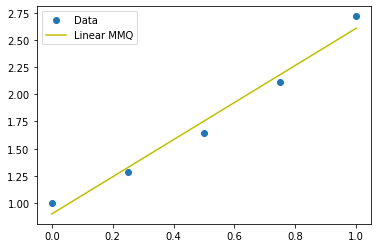

In [4]:
plt.figure()
eq = mmq(x,y,1)
plt.figure()
plt.plot(x,y,'o',label="Data")
plt.plot(x,[eq(i) for i in x],label="Linear MMQ",c="y")
plt.legend()

In [5]:
x = np.array([-1,0,1,2])
y = np.array([0,-1,0,7])

<Figure size 432x288 with 0 Axes>

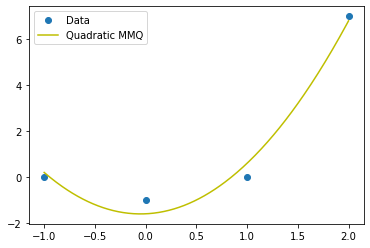

In [6]:
plt.figure()
eq = mmq(x,y,2)
plt.figure()
plt.plot(x,y,'o',label="Data")
x = [i/100 for i in range(-100,201)]
plt.plot(x,[eq(i) for i in x],label="Quadratic MMQ",c="y")
plt.legend()